In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [4]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


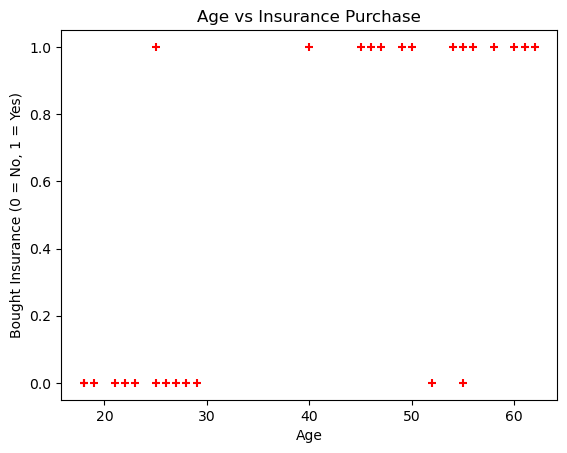

In [26]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
plt.xlabel("Age")
plt.ylabel("Bought Insurance (0 = No, 1 = Yes)")
plt.title("Age vs Insurance Purchase")
plt.show()

In [8]:
df.shape

(27, 2)

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
X_train, X_test, y_train, y_test=train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [11]:
X_test

,age
21,26
2,47
6,55


In [37]:
y_test

21    0
2     1
6     0
Name: bought_insurance, dtype: int64

In [14]:
X_train

,age
20,21
7,60
13,29
23,45
4,46
8,62
11,28
12,27
19,18
10,18


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model= LogisticRegression()

In [18]:
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_predicted=model.predict(X_test)
y_predicted

array([0, 1, 1], dtype=int64)

In [22]:
model.score(X_test,y_test)

0.6666666666666666

In [23]:
model.predict_proba(X_test)

array([[0.85062287, 0.14937713],
       [0.1523496 , 0.8476504 ],
       [0.04596676, 0.95403324]])

In [25]:
model.predict([[25]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [27]:
import numpy as np

In [30]:
age_range = np.linspace(df.age.min(), df.age.max(), 300)
age_range_reshaped = age_range.reshape(-1, 1)

#np.linspace(start, stop, num)
#Generates num evenly spaced values between start and stop.
#✅ Used here to create smooth age values for plotting the sigmoid curve.

#.reshape(-1, 1)
#Converts a 1D array into a 2D column vector (required for model input).
#✅ Ensures the shape is compatible with predict_proba().

In [31]:
probabilities = model.predict_proba(age_range_reshaped)[:, 1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


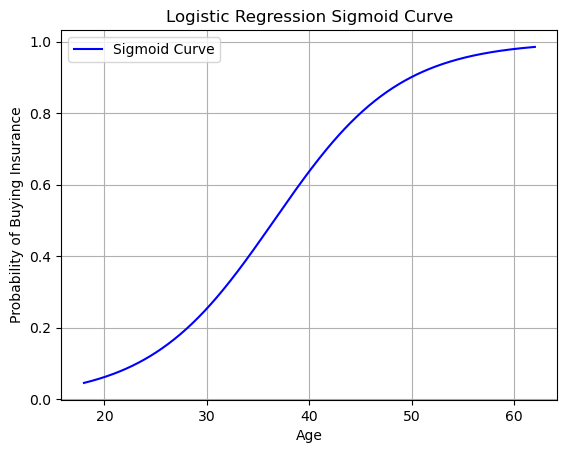

In [32]:
plt.plot(age_range, probabilities, color='blue', label='Sigmoid Curve')
plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.title("Logistic Regression Sigmoid Curve")
plt.legend()
plt.grid(True)
plt.show()

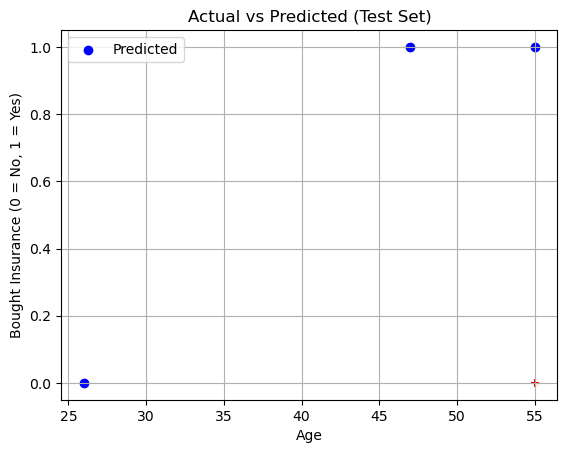

In [36]:
y_pred = model.predict(X_test)

# Plot actual values
plt.scatter(X_test,y_test,marker='+',color='red')

# Plot predicted values
plt.scatter(X_test, y_pred, color='blue', label='Predicted', marker='o')

# Labels and legend
plt.xlabel("Age")
plt.ylabel("Bought Insurance (0 = No, 1 = Yes)")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.grid(True)
plt.show()